In [126]:
# import numpy as np
# import pandas as pd
# import os
# # import Metrics
# from main import main

# df = pd.DataFrame(columns = ['servers','arrival','expected_waiting_time','measured_waiting_time','waiting_variance','data'])
# files = os.listdir()
# files = [file for file in files if '.csv' in file]
# for file in files:  
#     name = file.replace(".csv",'').replace("result ",'')
#     param = name.split(" ")
#     expected_waiting = float(param[0].replace("xm",''))
#     mean_waiting = float(param[1].replace("m",''))
#     var_waiting = float(param[2].replace("v",''))
#     servers = int(param[3].replace("n",''))
#     ut = float(param[4].replace("p",''))

#     data = np.genfromtxt(file, delimiter=',')
#     data =  [data[i][0] for i in range(len(data))]
#     df = pd.concat([df,pd.DataFrame({'servers':servers,'utilization':ut,'expected_waiting_time':expected_waiting,'measured_waiting_time':mean_waiting,'waiting_variance':var_waiting,'data':[data]})],ignore_index=True)

In [ ]:
import numpy as np
import pandas as pd
import os
# import Metrics
from main import main

df = pd.DataFrame(columns = ['servers','utilization','time','expected_waiting_time','measured_waiting_time','waiting_variance','wait','queue'])
files = os.listdir()
files = [file for file in files if '.csv' in file]
for file in files:  
    name = file.replace(".csv",'').replace("result ",'')
    param = name.split(" ")
    expected_waiting = float(param[0].replace("xm",''))
    mean_waiting = float(param[1].replace("m",''))
    var_waiting = float(param[2].replace("v",''))
    servers = int(param[3].replace("n",''))
    ut = float(param[4].replace("p",''))
    time = float(param[5].replace("t",''))

    data = np.genfromtxt(file, delimiter=',')
    wait =  [data[i][0] for i in range(len(data))]
    queue =  [data[i][1] for i in range(len(data))]
    df = pd.concat([df,pd.DataFrame({'servers':servers,'utilization':ut,'time':time,'expected_waiting_time':expected_waiting,'measured_waiting_time':mean_waiting,'waiting_variance':var_waiting,'wait':[wait],'queue':queue})],ignore_index=True)

In [127]:
df = df.sort_values(['servers','utilization'])

Text(0.5, 0, 'Server Utilization')

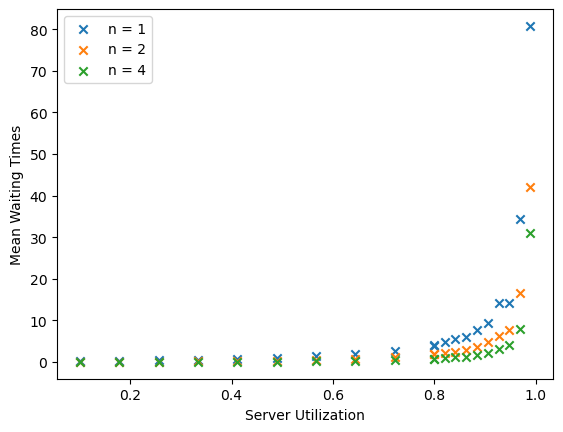

In [128]:
import matplotlib.pyplot as plt

colours = ['b','g','k','r']
servers = [1,2,4]
for i in servers:
    # for j in df['arrival'].unique():
    plt.scatter(df.loc[(df['servers']==i),'utilization'],df.loc[df['servers']==i,'measured_waiting_time'],label = 'n = ' + str(i),marker = 'x')
    # plt.scatter(df.loc[(df['servers']==i),'utilization'],df.loc[df['servers']==i,'expected_waiting_time'],marker = 'x')
plt.legend(loc='best')
plt.ylabel('Mean Waiting Times')
# plt.ylim(0,5)
plt.xlabel('Server Utilization')

Text(0.5, 0, 'Server Utilization')

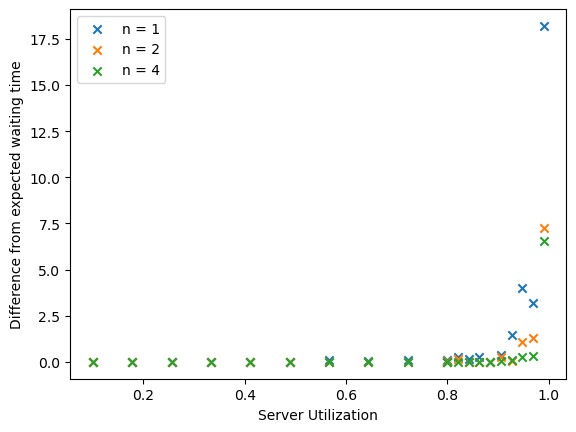

In [129]:
import matplotlib.pyplot as plt

colours = ['b','g','k','r']
servers = [1,2,4]
for i in servers:
    # for j in df['arrival'].unique():
    plt.scatter(df.loc[(df['servers']==i),'utilization'],np.abs(df.loc[df['servers']==i,'measured_waiting_time'] - df.loc[df['servers']==i,'expected_waiting_time'] ),label = 'n = ' + str(i),marker = 'x')
    # plt.scatter(df.loc[(df['servers']==i),'utilization'],df.loc[df['servers']==i,'expected_waiting_time'],marker = 'x')
plt.legend(loc='best')
plt.ylabel('Difference from expected waiting time')
plt.xlabel('Server Utilization')

In [124]:
np.concatenate((np.linspace(0.1,0.8,10),np.linspace(0.8,0.99,10)),axis=None)

array([0.1       , 0.17777778, 0.25555556, 0.33333333, 0.41111111,
       0.48888889, 0.56666667, 0.64444444, 0.72222222, 0.8       ,
       0.8       , 0.82111111, 0.84222222, 0.86333333, 0.88444444,
       0.90555556, 0.92666667, 0.94777778, 0.96888889, 0.99      ])

In [106]:
# colours = ['b','g','k','r']
# servers = [1,2,4]
# for j in df['utilization'].unique():
#     for i in servers:
#         plt.hist(df.loc[(df['servers']==i) & (df['utilization']==j),'data'],label = 'n = ' + str(i),bins = 10,density = True)
#     # plt.scatter(df.loc[(df['servers']==i),'utilization'],df.loc[df['servers']==i,'expected_waiting_time'],marker = 'x')
#     plt.legend(loc='best')
#     plt.ylabel('Difference from expected waiting time')
#     plt.xlabel('Server Utilization')
#     plt.show()

(array([1.63168653e-01, 5.36471180e-02, 2.60491342e-02, 1.23841774e-02,
        5.48054456e-03, 2.04858520e-03, 1.01932834e-03, 6.78449055e-04,
        2.25046516e-04, 4.96426138e-05]),
 array([ 0.        ,  3.77713857,  7.55427715, 11.33141572, 15.10855429,
        18.88569287, 22.66283144, 26.43997002, 30.21710859, 33.99424716,
        37.77138574]),
 <BarContainer object of 10 artists>)

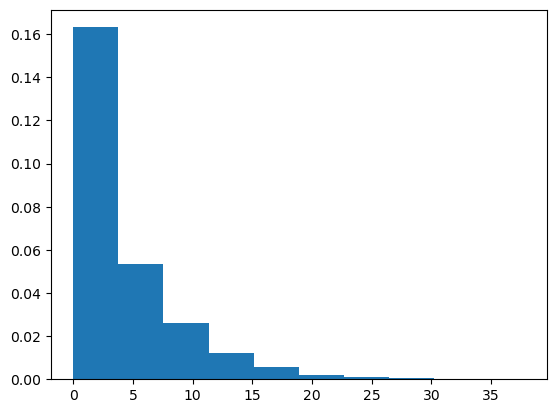

In [105]:
plt.hist(df.loc[(df['servers']==1) & (df['utilization']==0.7992857142857143),'data'],label = 'n = ' + str(i),bins = 10,density = True)

In [107]:
# import matplotlib.pyplot as plt

# colours = ['b','g','k','r']
# servers = [1,2,4]
# for i in servers:
#     # for j in df['arrival'].unique():
#     plt.bar(df.loc[(df['servers']==i),'utilization'],df.loc[df['servers']==i,'waiting_variance'],label = 'n = ' + str(i))
#     # plt.scatter(df.loc[(df['servers']==i),'utilization'],df.loc[df['servers']==i,'expected_waiting_time'],marker = 'x')
# plt.legend(loc='best')
# plt.ylabel('Difference from expected waiting time')
# plt.xlabel('Server Utilization')

In [130]:
mt = max(df['time']) 

plt.plot(range(len(df.loc[(df['utilization']== 0.99)&(df['servers']==1)&df['time']==mt,'queue'])),df.loc[(df['utilization']== 0.99)&(df['servers']==1)&df['time']==mt,'queue'])

KeyError: 'time'